In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Groupby
If you have large datasets groupby is your friend.  It helps you break up your data. I am going to give you some examples that might come in handy.  I have Iron and Arsenic data I made up from three locations with different weather.  Look at the data.

In [3]:
df=pd.read_excel('groupby.xlsx',index_col='Date',parse_dates=True)

In [14]:
df

,Location,Weather,Iron,Arsenic
Date,,,,
2016-01-01,1,sunny,54,1
2016-02-01,1,cloudy,53,1
2016-03-01,1,rain,52,1
2016-04-01,1,fog,51,1
2016-05-01,1,sunny,50,1
2016-06-01,1,cloudy,49,1
2016-07-01,1,rain,48,1
2016-08-01,1,fog,47,1
2016-09-01,1,sunny,46,1


We can describe all the data!

In [9]:
df.describe()

,Location,Iron,Arsenic
count,30.000000,30.000000,30.000000
mean,2.000000,23.166667,6.366667
std,0.830455,19.461870,8.027897
min,1.000000,5.000000,1.000000
25%,1.000000,5.000000,1.000000
50%,2.000000,15.000000,1.500000
75%,3.000000,46.750000,10.000000
max,3.000000,54.000000,30.000000


In [10]:
df.mean()

Location     2.000000
Iron        23.166667
Arsenic      6.366667
dtype: float64

## suppose you want the data by location??

In [11]:
df.groupby('Location').mean()

,Iron,Arsenic
Location,,
1,49.5,1.0
2,5.0,13.2
3,15.0,4.9


In [12]:
df.groupby('Weather').mean()

,Location,Iron,Arsenic
Weather,,,
cloudy,2,23.000000,8.222222
fog,2,23.000000,6.333333
rain,2,23.333333,5.333333
sunny,2,23.333333,5.222222


In [13]:
df.groupby(['Location','Weather']).mean()

Iron    Arsenic
Location Weather                 
1        cloudy     49   1.000000
         fog        49   1.000000
         rain       50   1.000000
         sunny      50   1.000000
2        cloudy      5  18.333333
         fog         5  15.000000
         rain        5   9.500000
         sunny       5   9.333333
3        cloudy     15   5.333333
         fog        15   3.000000
         rain       15   5.500000
         sunny      15   5.333333

## The next cool thing is a groupby for loop to look at parts of your data.

In [19]:
for locat, df_group in df.groupby('Location'):
    print 'location',locat
    print df_group.mean()

location 1
Location     1.0
Iron        49.5
Arsenic      1.0
dtype: float64
location 2
Location     2.0
Iron         5.0
Arsenic     13.2
dtype: float64
location 3
Location     3.0
Iron        15.0
Arsenic      4.9
dtype: float64


## but you can also plot the data now for each group and then do statistics....

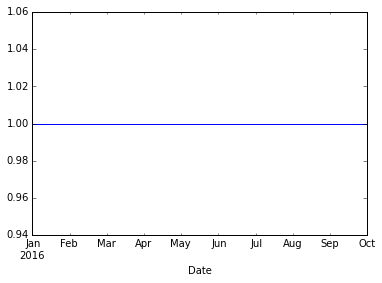

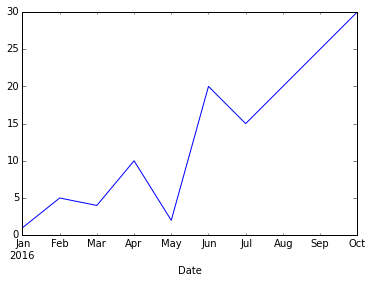

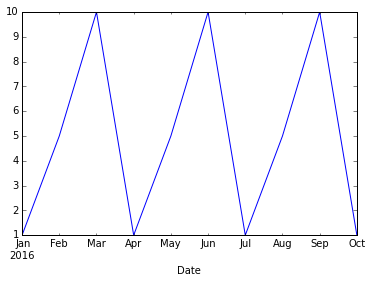

In [31]:
for locat, df_group in df.groupby('Location'):
    fig,ax=plt.subplots()
    df_group.Arsenic.plot(ax=ax)